Лабораторная работа №2. Исследование выполнения норм эффективности защиты речевой информации от утечки по акустическому каналу
===

In [1]:
import librosa
from scipy import fftpack
import numpy as np
import IPython.display as ipd
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import math

def plot(wav):
    #print("Строим графики для", wav, "...")
    x, sr = librosa.load(wav)
    #print("Audio array", x.shape[0]) 
    #print("Sample rate", sr)

    #График зависимости времени от амплитуды
    plt.figure(figsize=(20, 7))
    librosa.display.waveplot(x, sr=sr)
    plt.suptitle('График зависимости времени от амплитуды')
    
    #Спектрограмма
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(20, 7))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.suptitle('Спектрограмма')
    plt.colorbar(format='%+2.0f dB')


    #График зависимости частоты от мощности
    X = fftpack.fft(x)
    freqs = fftpack.fftfreq(len(x)) * sr
    db=librosa.amplitude_to_db(np.abs(X))
    
    fig, ax = plt.subplots(figsize=(20, 7))
    ax.stem(freqs, db, linefmt='b-', use_line_collection=True)
    ax.set_xlabel('Частота, Гц')
    ax.set_ylabel('Мощность, дБ')
    ax.set_xlim(0, 4000)
    ax.set_ylim(0, 80)
    plt.xticks(np.arange(0, 4000, 500))
    plt.yticks(np.arange(0, 80, 5))
    plt.suptitle('График зависимости частоты от мощности')
    plt.show()
    
def octave(wav):
    print("Вычисляем мощность в дБ на частотах 250,500,1000,2000,4000 Гц для", wav, "...")
    x, sr = librosa.load(wav)
    step=x.shape[0]/sr
    X = fftpack.fft(x)
    freqs = fftpack.fftfreq(len(x)) * sr
    db=librosa.amplitude_to_db(np.abs(X))
    oct1=(db[int(250*step)]+db[int(250*step+1)]+db[int(250*step-1)]+db[int(250*step+2)]+db[int(250*step-2)])/5
    oct2=(db[int(500*step)]+db[int(500*step+1)]+db[int(500*step-1)]+db[int(500*step+2)]+db[int(500*step-2)])/5
    oct3=(db[int(1000*step)]+db[int(1000*step+1)]+db[int(1000*step-1)]+db[int(1000*step+2)]+db[int(1000*step-2)])/5
    oct4=(db[int(2000*step)]+db[int(2000*step+1)]+db[int(2000*step-1)]+db[int(2000*step+2)]+db[int(2000*step-2)])/5
    oct5=(db[int(3500*step)]+db[int(3500*step+1)]+db[int(3500*step-1)]+db[int(3500*step+2)]+db[int(3500*step-2)])/5
    return oct1,oct2,oct3,oct4,oct5

def snr(wav1,wav2):
    oct1=octave(wav1)
    oct2=octave(wav2)
    print("Вычисляем отношение сигнал/шум на частотах 250,500,1000,2000,4000 Гц для сигнала", wav1, "и шума", wav2, "...")
    return tuple(np.subtract(oct1,oct2))

def intel(wav1,wav2):
    if sum(snr(wav1,wav2))/5 < -3:
        print("Отсутствует утечка информации при сигнале", wav1, "и шуме", wav2)
    else:
        print("Присутствует утечка информации при сигнале", wav1, "и шуме", wav2)

Цель работы:
---
1. Ознакомление с техническими возможностями средств анализа сигналов акустического канала;
2. Ознакомление с техническими характеристиками акустических сигналов;
3. Исследование практического использования технических средств анализа возможности утечки информации по акустическому каналу;
4. Исследование необходимости применение средств зашумления для защиты помещения от утечки информации по акустическому каналу;

Порядок выполнения работы:
---
1.	Настроить источник информативного и шумового сигнала в трех режимах на слух: равная мощность, большая мощность информативного сигнала, меньшая мощность информативного сигнала;
2.	Записать в формат wave информативный и шумовой сигнал в каждой расчетной точке для всех трех режимов согласно рис.2 используя микрофон;
3.	Используя приведенный в лабораторном комплексе формат, построить и проанализировать графики спектрограмм, зависимости частоты от мощности;
4.	используя приведенный в лабораторном комплексе формат, провести расчеты мощности звука на октавных частотах для информативного сигнала и шума;
5.	Определить возможность утечки информации при использовании генератора шума в каждой расчетной точке для каждого из режимов;
6.	По всем результатам расчетов сделайте выводы.

![План2](https://raw.githubusercontent.com/azarun/tzilabs/master/plan2.png)

!!! Только для работы в облаке !!! Для загрузки файлов в облаке используйте команду
---
!wget https://example.com/my_wave_file.wav
---

In [ ]:
#Пример
!wget https://github.com/azarun/tzilabs/blob/master/cartman_07.wav
!wget https://github.com/azarun/tzilabs/blob/master/cartman_08.wav
!wget https://github.com/azarun/tzilabs/blob/master/white_noise.wav

Для воспроизведения wave файла используйте функцию
---
ipd.Audio('C:\path\file')
---

In [3]:
#Пример
ipd.Audio('cartman_07.wav')

In [4]:
#Пример
ipd.Audio('cartman_08.wav')

Для построения графиков wave файла используйте функцию
---
plot('C:\path\file')
---

C:\Users\pavaz\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\pavaz\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\pavaz\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


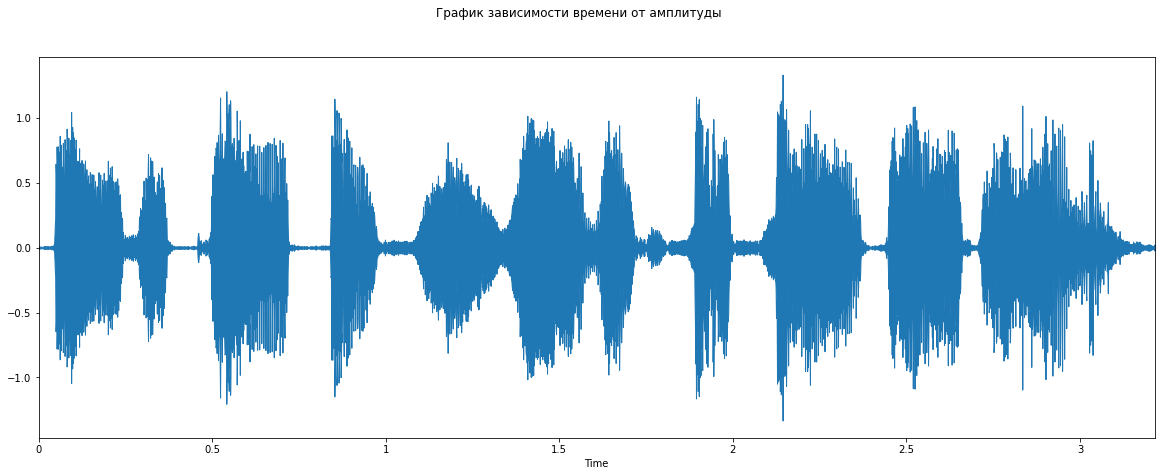

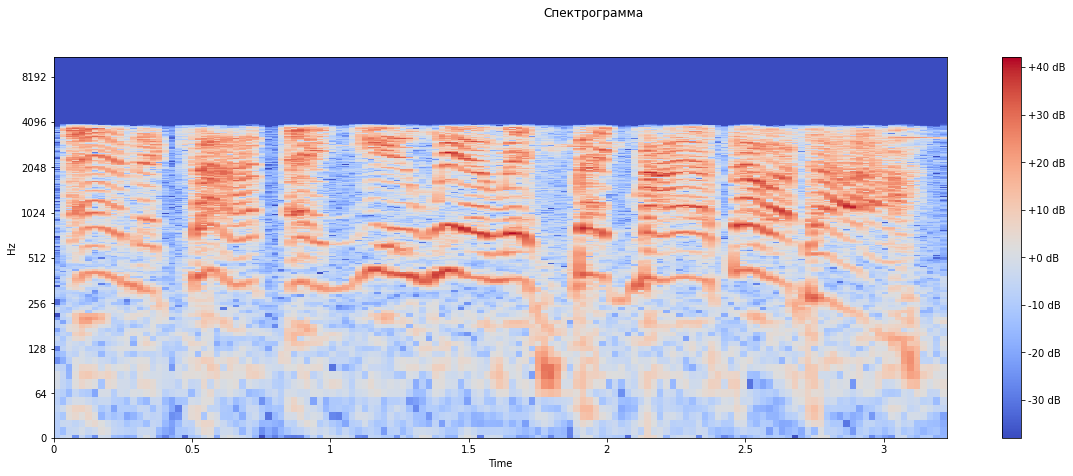

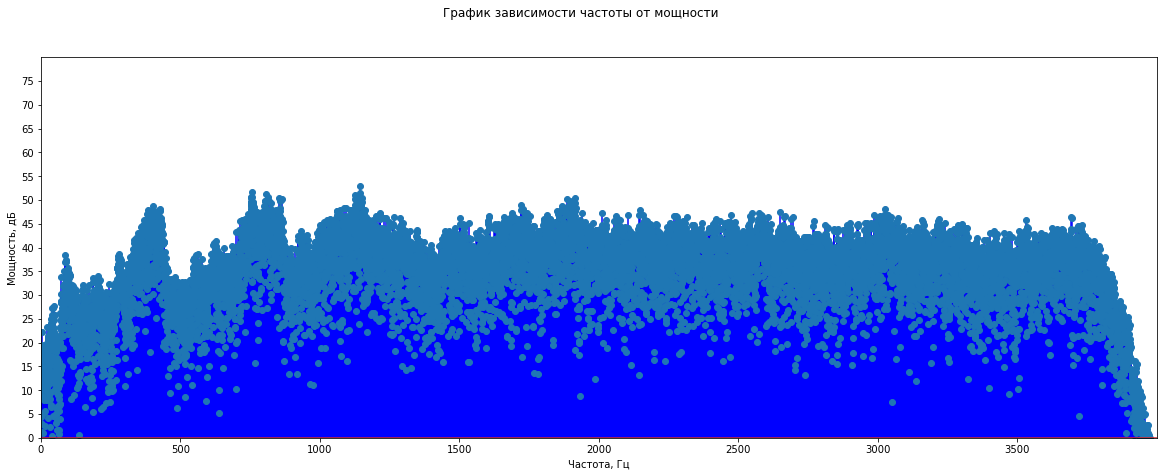

In [5]:
#Пример
plot('cartman_07.wav')

C:\Users\pavaz\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\pavaz\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\pavaz\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


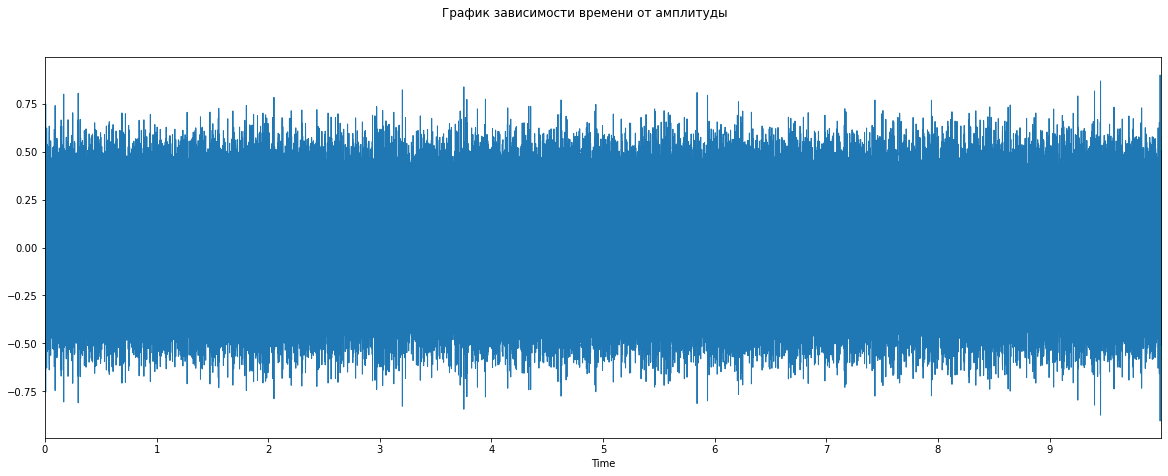

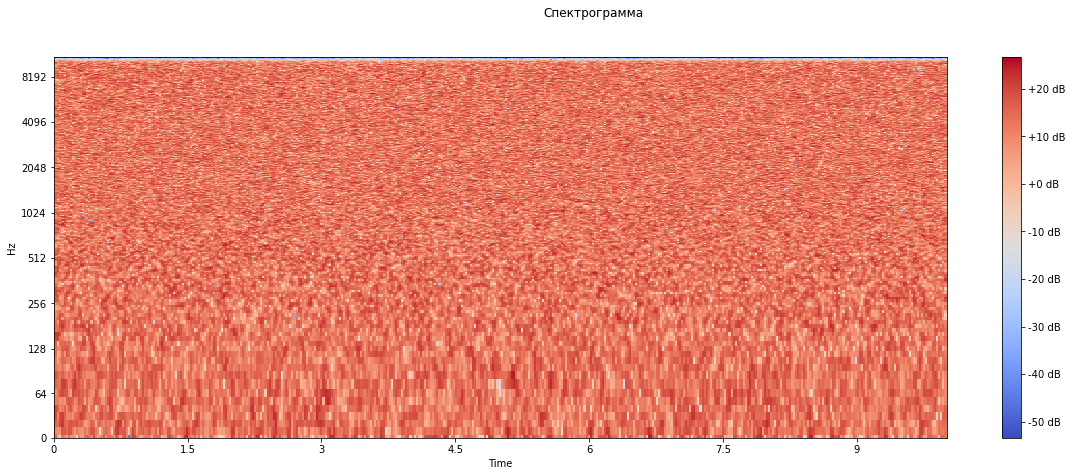

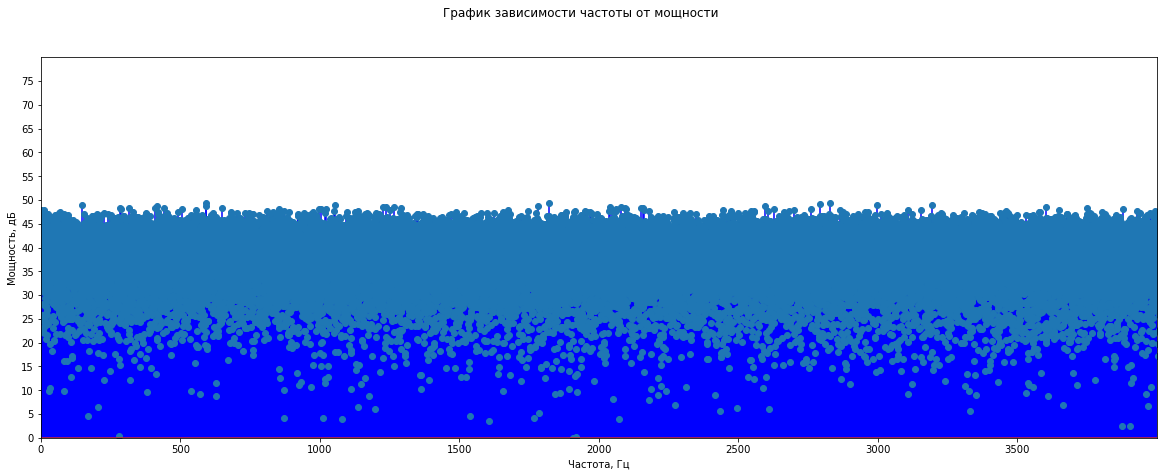

In [6]:
#Пример
plot('white_noise.wav')

Для вычисления мощности звука на октавных частотах используйте функцию 
---
octave('C:\path\file')
---

In [7]:
#Пример
octave('cartman_07.wav')

Вычисляем мощность в дБ на частотах 250,500,1000,2000,4000 Гц для cartman_07.wav ...


(24.366497802734376,
 24.62024688720703,
 40.04033508300781,
 38.114987182617185,
 30.24517822265625)

In [8]:
#Пример
octave('white_noise.wav')

Вычисляем мощность в дБ на частотах 250,500,1000,2000,4000 Гц для white_noise.wav ...


(33.83631591796875,
 39.77977294921875,
 35.5695068359375,
 41.29653625488281,
 32.76316833496094)

Для вычисления отношения сигнал/шум на октавных частотах используйте функцию 
---
snr('C:\path\file1', 'C:\path\file2')
---

In [9]:
#Пример
snr('cartman_07.wav','white_noise.wav')

Вычисляем мощность в дБ на частотах 250,500,1000,2000,4000 Гц для cartman_07.wav ...
Вычисляем мощность в дБ на частотах 250,500,1000,2000,4000 Гц для white_noise.wav ...
Вычисляем отношение сигнал/шум на частотах 250,500,1000,2000,4000 Гц для сигнала cartman_07.wav и шума white_noise.wav ...


(-9.469818115234371,
 -15.159526062011722,
 4.470828247070308,
 -3.181549072265625,
 -2.5179901123046875)

In [10]:
#Пример
snr('cartman_08.wav','white_noise.wav')

Вычисляем мощность в дБ на частотах 250,500,1000,2000,4000 Гц для cartman_08.wav ...
Вычисляем мощность в дБ на частотах 250,500,1000,2000,4000 Гц для white_noise.wav ...
Вычисляем отношение сигнал/шум на частотах 250,500,1000,2000,4000 Гц для сигнала cartman_08.wav и шума white_noise.wav ...


(4.166864013671876,
 0.07485351562499432,
 -3.978613281250002,
 -14.904107666015623,
 1.7886718749999986)

Для определения утечки информации используйте функцию 
---
intel('C:\path\file1', 'C:\path\file2')
---

In [11]:
#Пример
intel('cartman_07.wav','white_noise.wav')

Вычисляем мощность в дБ на частотах 250,500,1000,2000,4000 Гц для cartman_07.wav ...
Вычисляем мощность в дБ на частотах 250,500,1000,2000,4000 Гц для white_noise.wav ...
Вычисляем отношение сигнал/шум на частотах 250,500,1000,2000,4000 Гц для сигнала cartman_07.wav и шума white_noise.wav ...
Отсутствует утечка информации при сигнале cartman_07.wav и шуме white_noise.wav


In [12]:
#Пример
intel('cartman_08.wav','white_noise.wav')

Вычисляем мощность в дБ на частотах 250,500,1000,2000,4000 Гц для cartman_08.wav ...
Вычисляем мощность в дБ на частотах 250,500,1000,2000,4000 Гц для white_noise.wav ...
Вычисляем отношение сигнал/шум на частотах 250,500,1000,2000,4000 Гц для сигнала cartman_08.wav и шума white_noise.wav ...
Присутствует утечка информации при сигнале cartman_08.wav и шуме white_noise.wav
